<a href="https://colab.research.google.com/github/Renad-CAI/T5_week3/blob/main/Lab_exam_3_Ensemble_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [78]:
import pandas as pd
import numpy as np

# Load the dataset


In [79]:
df = pd.read_csv('/content/Traffic_Jams.csv')

# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [80]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [81]:
df.shape

(6324, 9)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               6324 non-null   object
 1   Date               6324 non-null   int64 
 2   Day of the week    6324 non-null   object
 3   CarCount           6324 non-null   int64 
 4   BikeCount          6324 non-null   int64 
 5   BusCount           6324 non-null   int64 
 6   TruckCount         6324 non-null   int64 
 7   Total              6324 non-null   int64 
 8   Traffic Situation  6324 non-null   object
dtypes: int64(6), object(3)
memory usage: 444.8+ KB


In [83]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,16.043327,64.355629,12.013283,12.557875,18.658128,107.584915
std,8.956907,44.307088,11.363955,12.319831,10.724822,55.850784
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.000000,3.000000,1.000000,10.000000,53.000000
50%,16.000000,61.000000,9.000000,10.000000,18.000000,103.000000
75%,24.000000,101.250000,19.000000,20.000000,27.000000,151.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


Text(0.5, 1.0, 'The Distribution of the Target Variable (Traffic Situation)')

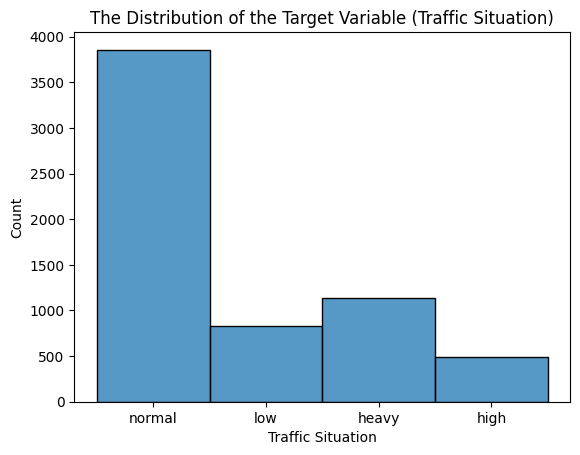

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data = df, x= df['Traffic Situation'])
plt.title('The Distribution of the Target Variable (Traffic Situation)')

# We see the classes are imbalanced, class called normal has most of the data than others
# We need to implement balanced class technique to solve this by using the SMOTE method

In [85]:
num_col = df.select_dtypes(include = ['number'])
num_col

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
0,10,13,2,2,24,41
1,10,14,1,1,36,52
2,10,10,2,2,32,46
3,10,10,2,2,36,50
4,10,11,2,1,34,48
...,...,...,...,...,...,...
6319,9,26,16,13,16,71
6320,9,72,25,10,27,134
6321,9,107,13,14,28,162
6322,9,106,18,13,27,164


In [86]:
categorical_col = df.select_dtypes(include = ['object'])
categorical_col

,Time,Day of the week,Traffic Situation
0,12:00:00 AM,Tuesday,normal
1,12:15:00 AM,Tuesday,normal
2,12:30:00 AM,Tuesday,normal
3,12:45:00 AM,Tuesday,normal
4,1:00:00 AM,Tuesday,normal
...,...,...,...
6319,10:30:00 AM,Thursday,normal
6320,8:00:00 PM,Thursday,high
6321,9:00:00 PM,Thursday,high
6322,9:30:00 PM,Thursday,high


In [87]:
corr_metrix = num_col.corr()
corr_metrix

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
Date,1.000000,-0.010507,-0.001985,-0.006166,0.021137,-0.006041
CarCount,-0.010507,1.000000,0.705941,0.664491,-0.583984,0.971386
BikeCount,-0.001985,0.705941,1.000000,0.581289,-0.585670,0.779261
BusCount,-0.006166,0.664491,0.581289,1.000000,-0.533847,0.763496
TruckCount,0.021137,-0.583984,-0.585670,-0.533847,1.000000,-0.508179
Total,-0.006041,0.971386,0.779261,0.763496,-0.508179,1.000000


# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [88]:
df.isnull().sum()

# We do not have any missing values

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [89]:
df.duplicated().sum()

# We do not have any duplicate values

0

In [90]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Time'] = encoder.fit_transform(df['Time'])
df['Day of the week'] = encoder.fit_transform(df['Day of the week'])
df['Traffic Situation'] = encoder.fit_transform(df['Traffic Situation'])

In [91]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,16,10,5,13,2,2,24,41,3
1,18,10,5,14,1,1,36,52,3
2,20,10,5,10,2,2,32,46,3
3,22,10,5,10,2,2,36,50,3
4,24,10,5,11,2,1,34,48,3


In [92]:
!pip install feature_engine

In [93]:
from feature_engine.outliers import OutlierTrimmer

trimmer = OutlierTrimmer(capping_method= 'iqr', tail= 'both')
df_no_outliers = trimmer.fit_transform(df)

In [94]:
df_no_outliers.shape

(6146, 9)

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [95]:
X = df_no_outliers.drop(columns= 'Traffic Situation')
y = df_no_outliers['Traffic Situation']

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

Text(0.5, 1.0, 'The Distribution of the Target Variable (Traffic Situation)')

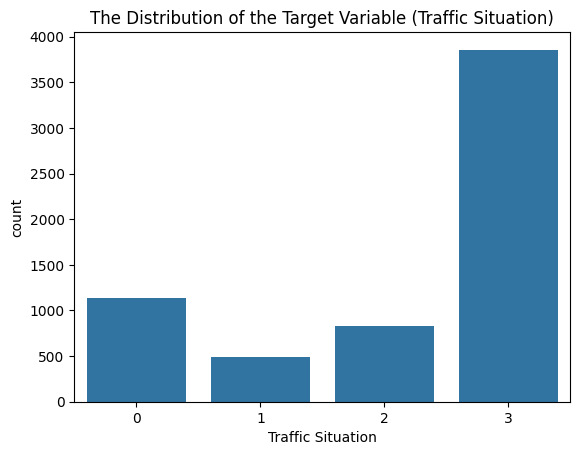

In [98]:
sns.countplot(data = df, x= df['Traffic Situation'])
plt.title('The Distribution of the Target Variable (Traffic Situation)')


Text(0.5, 1.0, 'The Distribution of the Target Variable (Day of the week)')

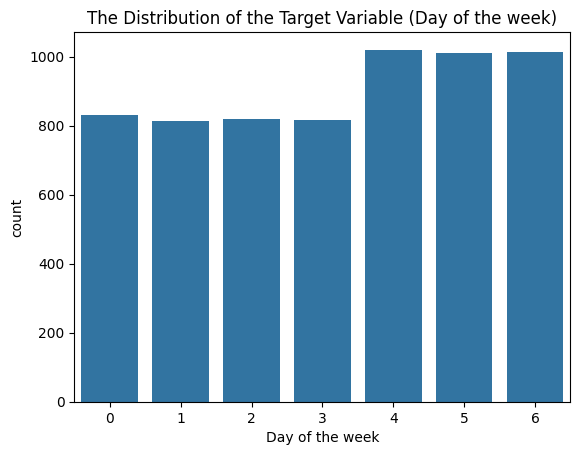

In [99]:
sns.countplot(data = df, x= df['Day of the week'])
plt.title('The Distribution of the Target Variable (Day of the week)')

Text(0.5, 1.0, 'The Relationships Between Varibles')

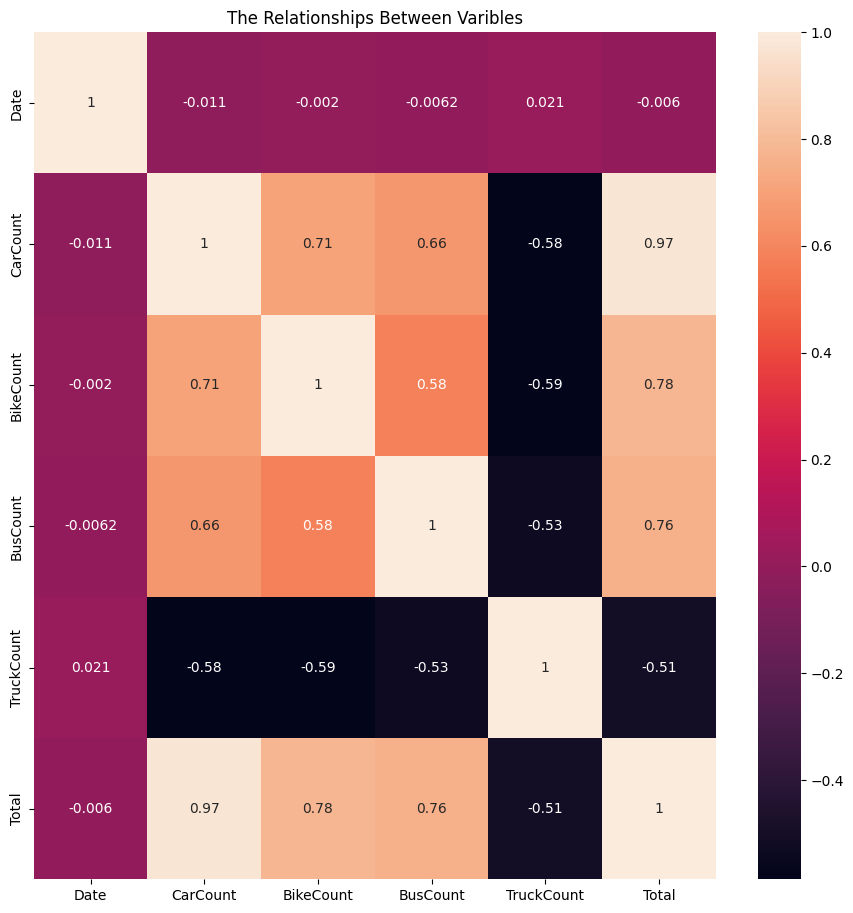

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize= (11,11))
sns.heatmap(data= corr_metrix, annot= True)
plt.title('The Relationships Between Varibles')

# Initialize and Train the Classifiers

In [100]:
!pip install imbalanced-learn

In [109]:
from imblearn.over_sampling import SMOTEN

smote = SMOTEN(random_state= 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_sc, y_train)

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [111]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

svc = SVC(kernel= 'linear', C= 1)
model1 = BaggingClassifier(estimator= svc, n_estimators= 10, random_state= 42)
model1.fit(X_train_smote, y_train_smote)

BaggingClassifier(estimator=SVC(C=1, kernel='linear'), random_state=42)

### Evaluate the model performance

In [112]:
y_pred_train = model1.predict(X_train_smote)
print(y_pred_train)

[0 1 0 ... 2 2 2]


In [113]:
y_pred_test = model1.predict(X_test_sc)
print(y_pred_test)

[3 2 2 ... 1 3 1]


In [114]:
from sklearn.metrics import accuracy_score, classification_report

acc_model1_train = accuracy_score(y_train_smote, y_pred_train)
print('The Accuracy for Bagging on Train set: ', acc_model1_train)

report = classification_report(y_train_smote, y_pred_train)
print('The Classification Report for Bagging on Train set: ', report)

The Accuracy for Bagging on Train set:  0.8836585365853659
The Classification Report for Bagging on Train set:                precision    recall  f1-score   support

           0       0.98      1.00      0.99      3075
           1       0.86      0.94      0.90      3075
           2       0.86      0.91      0.88      3075
           3       0.83      0.69      0.75      3075

    accuracy                           0.88     12300
   macro avg       0.88      0.88      0.88     12300
weighted avg       0.88      0.88      0.88     12300



In [115]:
acc_model1_test = accuracy_score(y_test, y_pred_test)
print('The Accuracy for Bagging on Test set: ', acc_model1_test)

report = classification_report(y_test, y_pred_test)
print('The Classification Report for Bagging on Test set: ', report)

The Accuracy for Bagging on Test set:  0.7983739837398374
The Classification Report for Bagging on Test set:                precision    recall  f1-score   support

           0       0.92      0.99      0.96       185
           1       0.49      0.90      0.63       105
           2       0.59      0.88      0.70       168
           3       0.95      0.72      0.82       772

    accuracy                           0.80      1230
   macro avg       0.74      0.87      0.78      1230
weighted avg       0.86      0.80      0.81      1230



In [116]:
# We see the accuracy for train set is : 88% and the accuracy for test set is : 80%
# The model has overfitting

## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [117]:
from sklearn.ensemble import GradientBoostingClassifier

model2 = GradientBoostingClassifier(n_estimators= 10, learning_rate= 0.1, random_state= 42)
model2.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(n_estimators=10, random_state=42)

### Evaluate the model performance

In [118]:
y_pred_train = model2.predict(X_train_smote)
print(y_pred_train)

[0 1 0 ... 2 2 2]


In [119]:
y_pred_test = model2.predict(X_test_sc)
print(y_pred_test)

[3 2 3 ... 3 3 3]


In [120]:
from sklearn.metrics import accuracy_score, classification_report

acc_model2_train = accuracy_score(y_train_smote, y_pred_train)
print('The Accuracy for Boosting on Train set: ', acc_model2_train)

report = classification_report(y_train_smote, y_pred_train)
print('The Classification Report for Boosting on Train set: ', report)

The Accuracy for Boosting on Train set:  0.9504065040650407
The Classification Report for Boosting on Train set:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      3075
           1       0.89      1.00      0.94      3075
           2       0.94      1.00      0.97      3075
           3       0.99      0.81      0.89      3075

    accuracy                           0.95     12300
   macro avg       0.95      0.95      0.95     12300
weighted avg       0.95      0.95      0.95     12300



In [121]:
acc_model2_test = accuracy_score(y_test, y_pred_test)
print('The Accuracy for Boosting on Test set: ', acc_model2_test)

report = classification_report(y_test, y_pred_test)
print('The Classification Report for Boosting on Test set: ', report)

The Accuracy for Boosting on Test set:  0.875609756097561
The Classification Report for Boosting on Test set:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       0.51      1.00      0.67       105
           2       0.77      0.99      0.87       168
           3       1.00      0.80      0.89       772

    accuracy                           0.88      1230
   macro avg       0.82      0.95      0.86      1230
weighted avg       0.93      0.88      0.89      1230



In [122]:
# We see the accuracy for train set is : 95% and the accuracy for test set is : 88%
# The model has overfitting

## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [123]:
from sklearn.ensemble import StackingClassifier

models = ([
    ('svc', svc),
    ('GradientBoostingClassifier', model2)
])


### Define meta-learner (LogisticRegression)

In [124]:
from sklearn.linear_model import LogisticRegression

meta_learner = LogisticRegression()


### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [125]:
model3 = StackingClassifier(estimators= models, final_estimator= meta_learner)
model3.fit(X_train_smote, y_train_smote)

StackingClassifier(estimators=[('svc', SVC(C=1, kernel='linear')),
                               ('GradientBoostingClassifier',
                                GradientBoostingClassifier(n_estimators=10,
                                                           random_state=42))],
                   final_estimator=LogisticRegression())

### Evaluate the model performance

In [126]:
y_pred_train = model3.predict(X_train_smote)
print(y_pred_train)

[0 1 0 ... 2 2 2]


In [127]:
y_pred_test = model3.predict(X_test_sc)
print(y_pred_test)

[3 2 3 ... 3 3 3]


In [128]:
from sklearn.metrics import accuracy_score, classification_report

acc_model3_train = accuracy_score(y_train_smote, y_pred_train)
print('The Accuracy for Stacking on Train set: ', acc_model3_train)

report = classification_report(y_train_smote, y_pred_train)
print('The Classification Report for Stacking on Train set: ', report)

The Accuracy for Stacking on Train set:  0.9643089430894309
The Classification Report for Stacking on Train set:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      3075
           1       0.94      0.99      0.97      3075
           2       0.94      0.99      0.97      3075
           3       0.98      0.87      0.92      3075

    accuracy                           0.96     12300
   macro avg       0.97      0.96      0.96     12300
weighted avg       0.97      0.96      0.96     12300



In [129]:
acc_model3_test = accuracy_score(y_test, y_pred_test)
print('The Accuracy for Stacking on Test set: ', acc_model3_test)

report = classification_report(y_test, y_pred_test)
print('The Classification Report for Stacking on Test set: ', report)

The Accuracy for Stacking on Test set:  0.9219512195121952
The Classification Report for Stacking on Test set:                precision    recall  f1-score   support

           0       0.99      1.00      1.00       185
           1       0.71      0.98      0.82       105
           2       0.77      0.99      0.87       168
           3       1.00      0.88      0.93       772

    accuracy                           0.92      1230
   macro avg       0.87      0.96      0.91      1230
weighted avg       0.94      0.92      0.93      1230



In [133]:
# We see the accuracy for train set is : 96% and the accuracy for test set is : 92%
# The model has overfitting

# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:

Q1: I think the Total number of carts, bicks etc.. is important to determine the Traffic Situatio

Q2: the advantages of using ensemble methods over single models is to build a strong model that combine each advantage of each single model, and it will give us higher accuracy and diversty than using single model

Q3: for the bagging using SVC with 10 estimtors, the accuracy for train set is : 88% and the accuracy for test set is : 80%

for boosting using GradientBoostingClassifier, the accuracy for train set is : 95% and the accuracy for test set is : 88%

for stacking method, the accuracy for train set is : 96% and the accuracy for test set is : 92%

The highes accuracy is from stacking method witch is combines two classifier I used witch is 92%

and there is overfirring for all methods I used

Q4: I used the accuracy score and classifiaction report becuse the tasks was classifications